<a href="https://colab.research.google.com/github/CasCard/Machine-Learning-Project/blob/master/CNNMNIST_Digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model
import time as t

In [25]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
print("x_train.shape",x_train.shape)

x_train.shape (60000, 28, 28)


In [26]:
x_train=np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [27]:
K=len(set(y_train))
print("Number of classes:",K)

Number of classes: 10


In [0]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dense(K,activation='softmax')(x)

model=Model(i,x)

In [34]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               2626

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
A1=t.time()
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)
A2=t.time()
print(A2-A1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.1783 - accuracy: 0.9459 - val_loss: 0.0675 - val_accuracy: 0.9785
Epoch 2/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0642 - accuracy: 0.9804 - val_loss: 0.0472 - val_accuracy: 0.9850
Epoch 3/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0461 - accuracy: 0.9854 - val_loss: 0.0427 - val_accuracy: 0.9857
Epoch 4/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0360 - accuracy: 0.9882 - val_loss: 0.0441 - val_accuracy: 0.9859
Epoch 5/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0406 - val_accuracy: 0.9877
Epoch 6/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0238 - accuracy: 0.9922 - val_loss: 0.0357 - val_accuracy: 0.9894
Epoch 7/10
60000/60000 [==========================

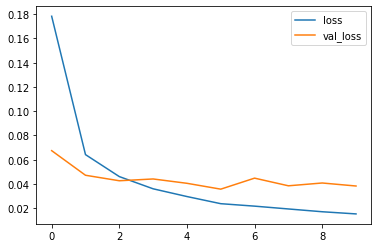

In [30]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

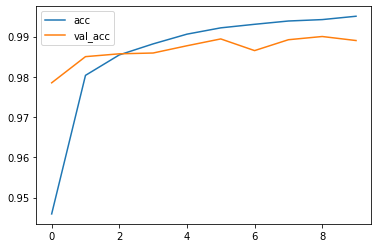

In [31]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [32]:
A3=t.time()
print(model.evaluate(x_test,y_test))
A4=t.time()
print(A4-A3)

10000/10000 [==============================] - 1s 73us/sample - loss: 0.0383 - accuracy: 0.9890
[0.03833755536116796, 0.989]
0.7640159130096436


In [33]:
predictions=model.predict([x_test])
print(np.argmax(predictions[1000]))

9
